# Analyse légère pics mutiples

Le bloc de code ci-dessous permet d'installer les modules requis à l'analyse.

In [1]:
# ! python.exe -m pip install --upgrade pip
# ! pip install -r requirements.txt

In [2]:
from outils_analyse.identification_des_pics import determiner_indexes_maximums_scipy
from outils_analyse.lecture_des_fichiers import lire_csv_a_3_colonnes, crop_pour_conserver_que_la_partie_avec_rampe
from outils_analyse.conversion_temps_en_potentiel import calculer_facteur_conversion_temps_en_potentiel_avec_mesure_rampe
import matplotlib.pyplot as plt
import os
import matplotlib

# Configuration de la taille de la police dans les figures
matplotlib.rcParams.update({'font.size': 30})

# Création du répertoire pour les graphiques s'il n'existe pas
out_dir = os.path.join("graphiques", "anal_multiple")
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Désactivation des avertissements
import warnings
warnings.filterwarnings("ignore")

# Configuration de la palette de couleurs des graphiques
import seaborn as sns
palette = sns.color_palette("muted")
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

## Estimation multipics
> Remplacez votre chemin d'accès pour vos valeurs extraites à `file_name`.

> Modifier la valeur de `zero_threshold` au besoin.

> Si vous détectez des faux pics, modifier `hauteur_minimum` et `distance_minimum` au besoin.

In [3]:
file_name = os.path.join("data", "excel", "Montage_B_step6.4.csv")
valeurs_en_array = lire_csv_a_3_colonnes(file_name, 9)
valeurs_cropped_debutant_par_t0 = crop_pour_conserver_que_la_partie_avec_rampe(valeurs_en_array, indice_colonne_rampe=2,
    zero_threshold=0.01, infinity_threshold=0.1)

debut = min(valeurs_cropped_debutant_par_t0[:,0])
valeurs_cropped_debutant_par_t0[:,0] -= debut

facteur_conversion_temps_en_potentiel = calculer_facteur_conversion_temps_en_potentiel_avec_mesure_rampe(
    valeurs_cropped_debutant_par_t0, 0, 2)

valeurs_avec_bonnes_unites = valeurs_cropped_debutant_par_t0.copy()
valeurs_avec_bonnes_unites[:, 0] = -facteur_conversion_temps_en_potentiel[0] * valeurs_cropped_debutant_par_t0[:, 0]

facteur_valeur = facteur_conversion_temps_en_potentiel[0]
facteur_incertitude = facteur_conversion_temps_en_potentiel[1]

liste_des_indexes_des_pics = determiner_indexes_maximums_scipy(valeurs_avec_bonnes_unites, colonne_y=1,
    hauteur_minimum=0.01, distance_minimum=45)

valeurs_avec_bonnes_unites_determination_des_pics = valeurs_avec_bonnes_unites
liste_des_indexes_des_pics = liste_des_indexes_des_pics

Estimation des pics : [ 2.682382   3.7868934  4.981568   6.7848506  8.633214  10.571743
 13.389372  14.786916  16.657822 ] [V]


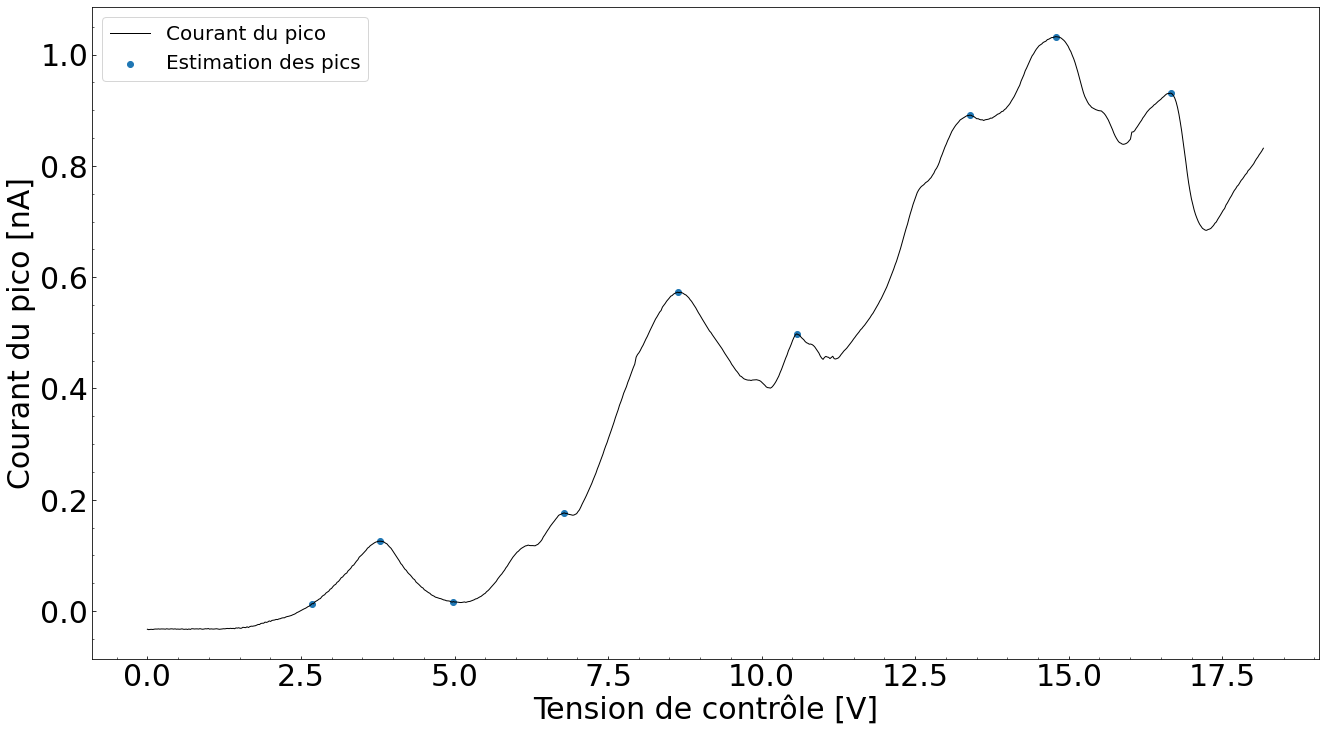

In [4]:
print(f"Estimation des pics : {valeurs_avec_bonnes_unites_determination_des_pics[liste_des_indexes_des_pics, 0]} [V]")

plt.figure(figsize=(22, 12))
plt.plot(valeurs_avec_bonnes_unites_determination_des_pics[:, 0],
            valeurs_avec_bonnes_unites_determination_des_pics[:, 1],
            label="Courant du pico", color="black", linewidth=1)


plt.scatter(valeurs_avec_bonnes_unites_determination_des_pics[liste_des_indexes_des_pics, 0],
            valeurs_avec_bonnes_unites_determination_des_pics[liste_des_indexes_des_pics, 1],
            label="Estimation des pics")


plt.xlabel("Tension de contrôle [V]")
plt.ylabel("Courant du pico [nA]")
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='both', direction='in')
plt.minorticks_on()

name, _ = os.path.splitext(os.path.basename(file_name))
plt.savefig(os.path.join(out_dir, name + ".png"), bbox_inches="tight")

# Affichage du graphique
plt.show()